# Week 5
# Getting Started with Pandas (Part 3)
# Analyzing MovieLens Data
We will continue our exploration of [MovieLens](https://grouplens.org/datasets/movielens/) `ml-latest-small` dataset.

In [1]:
import pandas as pd

In [2]:
# Load the processed rating data file from the previous class.
ratings_df = pd.read_csv('Data/ml-latest-small/ratings_processed.csv', sep = ',', index_col=0)
ratings_df.head()

,userId,movieId,rating,timestamp,Year,Month,Day,Hour,Minute,Second,DT
0,1,1,4.0,964982703,2000,7.0,30.0,14.0,45.0,3.0,2000-07-30 14:45:03
1,1,3,4.0,964981247,2000,NaN,NaN,NaN,NaN,NaN,2000-07-30 14:20:47
2,1,6,4.0,964982224,2000,NaN,NaN,NaN,NaN,NaN,2000-07-30 14:37:04
3,1,47,5.0,964983815,2000,NaN,NaN,NaN,NaN,NaN,2000-07-30 15:03:35
4,1,50,5.0,964982931,2000,NaN,NaN,NaN,NaN,NaN,2000-07-30 14:48:51


## 1. Gather Basic Information
- Shape
- Column names
- Data types
- Distribution of each column
- Missing values?

In [3]:
# Display shape
print(ratings_df.shape)

(100836, 11)


In [4]:
# Display column names
print(ratings_df.columns.values)

['userId' 'movieId' 'rating' 'timestamp' 'Year' 'Month' 'Day' 'Hour'
 'Minute' 'Second' 'DT']


In [5]:
# Display data types
print(ratings_df.dtypes)

userId         int64
movieId        int64
rating       float64
timestamp      int64
Year           int64
Month        float64
Day          float64
Hour         float64
Minute       float64
Second       float64
DT            object
dtype: object


In [6]:
# Show value counts of ratings
ratings_df["rating"].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [7]:
# show value counts of ratings in descendant order
ratings_df['rating'].value_counts().sort_index(ascending=False)

5.0    13211
4.5     8551
4.0    26818
3.5    13136
3.0    20047
2.5     5550
2.0     7551
1.5     1791
1.0     2811
0.5     1370
Name: rating, dtype: int64

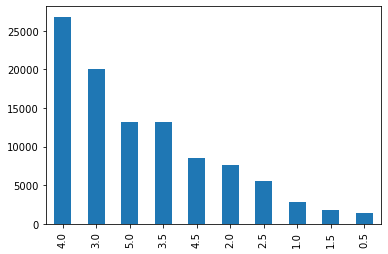

In [8]:
# draw a bar chart of ratings
ratings_df['rating'].value_counts().plot.bar()

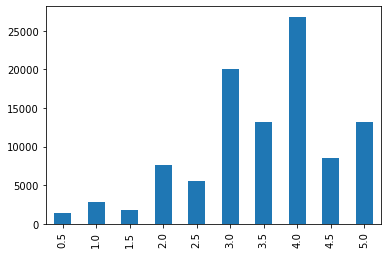

In [9]:
ratings_df['rating'].value_counts().sort_index().plot.bar()

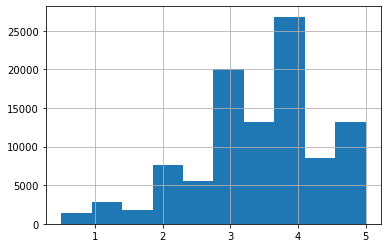

In [10]:
# Draw a histogram of ratings
ratings_df['rating'].hist()

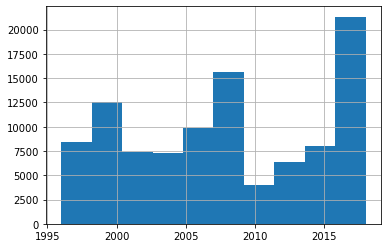

In [11]:
# Draw a histogram of years
ratings_df['Year'].hist()

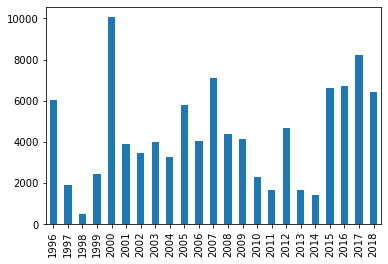

In [12]:
# draw a bar chart for year
ratings_df['Year'].value_counts().sort_index().plot.bar()

In [13]:
# Check for missing values
# It diplays the total missing values 
ratings_df.isnull().sum()

userId            0
movieId           0
rating            0
timestamp         0
Year              0
Month        100835
Day          100835
Hour         100835
Minute       100835
Second       100835
DT                0
dtype: int64

In [14]:
# This create the data frame Boolean values 
ratings_df.isnull()

,userId,movieId,rating,timestamp,Year,Month,Day,Hour,Minute,Second,DT
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,True,True,True,True,False
2,False,False,False,False,False,True,True,True,True,True,False
3,False,False,False,False,False,True,True,True,True,True,False
4,False,False,False,False,False,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
100831,False,False,False,False,False,True,True,True,True,True,False
100832,False,False,False,False,False,True,True,True,True,True,False
100833,False,False,False,False,False,True,True,True,True,True,False
100834,False,False,False,False,False,True,True,True,True,True,False


## 2. Identify Highly-Rated Movies
- For each movie, extract all of its ratings.
- Calculate the average rating of each movie.
- Sort the average ratings in descending order.
- What are the top 5 highly-rated movies? Notice anything strange?

In [15]:
# Load movies.csv for movie titles
movies_df = pd.read_csv('Data/ml-latest-small/movies.csv', sep=',')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [16]:
# The ID of movie Toy Story is 1.
# Let's create a filter to extract all of its user ratings.
filter1 = (ratings_df['movieId']== 1)
ratings_1 = ratings_df[filter1]
print('The number of the ratings Toy Story:', ratings_1.shape[0])
ratings_1.head()

The number of the ratings Toy Story: 215


,userId,movieId,rating,timestamp,Year,Month,Day,Hour,Minute,Second,DT
0,1,1,4.0,964982703,2000,7.0,30.0,14.0,45.0,3.0,2000-07-30 14:45:03
516,5,1,4.0,847434962,1996,NaN,NaN,NaN,NaN,NaN,1996-11-08 01:36:02
874,7,1,4.5,1106635946,2005,NaN,NaN,NaN,NaN,NaN,2005-01-25 01:52:26
1434,15,1,2.5,1510577970,2017,NaN,NaN,NaN,NaN,NaN,2017-11-13 07:59:30
1667,17,1,4.5,1305696483,2011,NaN,NaN,NaN,NaN,NaN,2011-05-18 01:28:03


In [17]:
# Calculate the average rating of Toy Story.
average_rating_toy_story = ratings_1['rating'].mean()
print('average_rating_toy_story:%.2f' % average_rating_toy_story)

average_rating_toy_story:3.92


In [18]:
# Assign the average rating to movies_df under a new column named "AvgRating"

movies_df.loc[0, 'AvgRating']=average_rating_toy_story
movies_df.head()

,movieId,title,genres,AvgRating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093
1,2,Jumanji (1995),Adventure|Children|Fantasy,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,NaN
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,NaN
4,5,Father of the Bride Part II (1995),Comedy,NaN


In [28]:
# How can we find the average rating for each movie?
# 1. Write a function "get_avg_rating()" that takes in ratings_df and a movie ID,
#    and returns its average rating.
# 2. Create a for loop to loop through all rows in movies_df.
# 3. In the loop, call "get_avg_rating()" and place the returned value in
#    "AvgRating" column.

def get_avg_rating(ratings_df, movie_id):
    
    filter_movie = (ratings_df['movieId']== movie_id)
    ratings_movie = ratings_df[filter_movie]
    
    average_rating = ratings_movie['rating'].mean()
    
    return average_rating

In [47]:
get_avg_rating(ratings_df, 1)

3.9209302325581397

In [56]:
# 2. Create a for loop to loop through all rows in movies_df.

for idx in movies_df.index:
    movie_id = movies_df.loc[idx, 'movieId']
    #print(' movie_id', movie_id)
    average_rating = get_avg_rating(ratings_df, movie_id)
    movies_df.loc[idx, 'AvgRating'] = average_rating
    
movies_df.head()

,movieId,title,genres,AvgRating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [57]:
# 18 movies does not get an average rating.
movies_df['AvgRating'].isnull().sum()

18

In [58]:
# Sort movies_df by AvgRating.
movies_df = movies_df.sort_values(by='AvgRating', ascending=False)

In [60]:
# Display the top 10 movies with highest average rating.

movies_df.head(10)

,movieId,title,genres,AvgRating
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


In [62]:
# It turns out that we also need to know the number of ratings given to a movie.
# Find the number of user ratings for each movie, and place the result in
# a new column named "NumRatings"

def get_num_ratings(ratings_df, movie_id):
    
    filter_movie = (ratings_df['movieId']== movie_id)
    ratings_movie = ratings_df[filter_movie]
    
    num_ratings = ratings_movie.shape[0]
    
    return num_ratings

In [63]:
get_num_ratings(ratings_df, 1)

215

In [67]:
# new column named "NumRatings"

for idx in movies_df.index:
    movie_id = movies_df.loc[idx, 'movieId']
    #print(' movie_id', movie_id)
    num_ratings = get_num_ratings(ratings_df, movie_id)
    movies_df.loc[idx, 'NumRatings'] = num_ratings
    
movies_df.head()

,movieId,title,genres,AvgRating,NumRatings
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0,1.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0,1.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0,1.0
9094,143511,Human (2015),Documentary,5.0,1.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0,1.0


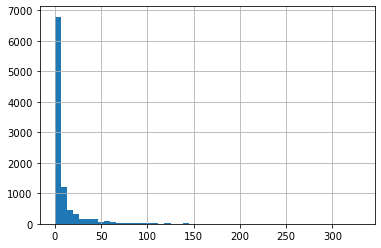

In [71]:
# How are NumRatings distributed?
movies_df['NumRatings'].hist(bins=50)

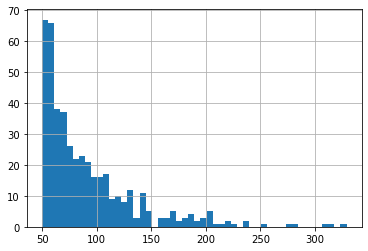

In [72]:
# Remove movies with very few ratings.

filter2 = (movies_df['NumRatings'] < 50)
movies_todrop = movies_df[filter2]
movies_df2 = movies_df.drop(movies_todrop.index)
movies_df2['NumRatings'].hist(bins=50)

In [73]:
# Find the top-10 highest rated movies.
movies_df2 = movies_df2.sort_values(by='AvgRating', ascending=False)

In [74]:
movies_df2.head(10)

,movieId,title,genres,AvgRating,NumRatings
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317.0
659,858,"Godfather, The (1972)",Crime|Drama,4.289062,192.0
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.272936,218.0
975,1276,Cool Hand Luke (1967),Drama,4.271930,57.0
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,4.268041,97.0
686,904,Rear Window (1954),Mystery|Thriller,4.261905,84.0
922,1221,"Godfather: Part II, The (1974)",Crime|Drama,4.259690,129.0
6315,48516,"Departed, The (2006)",Crime|Drama|Thriller,4.252336,107.0
914,1213,Goodfellas (1990),Crime|Drama,4.250000,126.0
694,912,Casablanca (1942),Drama|Romance,4.240000,100.0


## 3. Analyze Genres
- Split the string in "genres" column into separate genres.
- Create a set of all genres.
- Create a column for each genre. Use 0 and 1 to indicate whether each movie belongs to that genre.
- How many movies are there for each genre?
- What is the average rating for each genre?

In [75]:
# Split the string in "genre" column into separate genres.
genres_1 = movies_df.loc[0, 'genres']
print(genres_1)
print(genres_1.split('|'))

Adventure|Animation|Children|Comedy|Fantasy
['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']


In [76]:
# Create a set of all genres.
all_genres = set({})
for idx in movies_df.index:
    genres = movies_df.loc[idx, 'genres'].split('|')
    all_genres = all_genres.union(set(genres))
print(all_genres)

{'Adventure', '(no genres listed)', 'Romance', 'Comedy', 'War', 'Children', 'Drama', 'Fantasy', 'Musical', 'Thriller', 'Sci-Fi', 'Documentary', 'Crime', 'Action', 'Mystery', 'Horror', 'Western', 'Film-Noir', 'IMAX', 'Animation'}


In [77]:
# Create a column for each genre. 
# Use 0 and 1 to indicate whether each movie belongs to that genre.
for genre in all_genres:
    if '(' in genre: # exclude '(no genres listed)'
        continue
    movies_df[genre] = movies_df['genres'].str.contains(genre).astype(int)
movies_df.head()

,movieId,title,genres,AvgRating,NumRatings,Adventure,Romance,Comedy,War,Children,...,Sci-Fi,Documentary,Crime,Action,Mystery,Horror,Western,Film-Noir,IMAX,Animation
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0,1.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0,1.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9094,143511,Human (2015),Documentary,5.0,1.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0,1.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# How many movies are there for each genre?



In [ ]:
# What is the average rating for each genre?

